<a href="https://colab.research.google.com/github/Kobe97915/Kobe/blob/main/Survey_data_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Intelligence and Data Analytics Practical Training 2024**


**Presentation by Eric and Nelisiwe**

**Logistics Regression Model:**

Logistic regression is a popular classification technique due to its simplicity, interpretability and performance.


**The goal of this project is to get insight into the following topics:**

-Being able to train a logistic regression model.

-Performing which delivery methods offered by programmes.

-Testing and evaluation of the trained model. Being able to assess the model by means of different classification metrics: accuracy, recall, precision,f1-score.


In [ ]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns # fancy plots
import warnings
warnings.filterwarnings('ignore')

**Delivery Method**

The datasets consist of different delivery method that are offered by intitution base on different courses. the task is to train the Logistic regression to be able to classify this courses by delivery methods. In other words we are predicting which method does student prefer.

  **Reading the dataset and analysis**

  We are now determining the number of methods. In other words, how many different delivery methods are in the dataset? Is the dataset balanced? Balanced means that the distribution of the targets is more or less uniformly distributed. For this dataset balanced means that we have approximately the same number methods for each of the course name. You can use the Seaborn countplot for this. https://seaborn.pydata.org/generated/seaborn.countplot.html. The problem with imbalanced datasets is that the model you train can get a preference for the majority class.

  

In [ ]:
# Reading the dataset
df = pd.read_excel('//content/Survey Data .xlsx')
df.head()

,Course Name,Delivery Method,Enrolment,Respondents,Response Rate,Student Satisfaction Score
0,AB InBev Corporate Affairs Excise Programme,campus,270,108,40.0%,0.00%
1,AB InBev Corporate Affairs Excise Programme,campus,15,6,40.0%,0.00%
2,AB InBev Corporate Affairs Excise Programme,campus,45,18,40.0%,0.00%
3,AB InBev Corporate Affairs Excise Programme,campus,15,6,40.0%,83.33%
4,AB InBev Corporate Affairs Excise Programme,campus,15,6,40.0%,83.33%


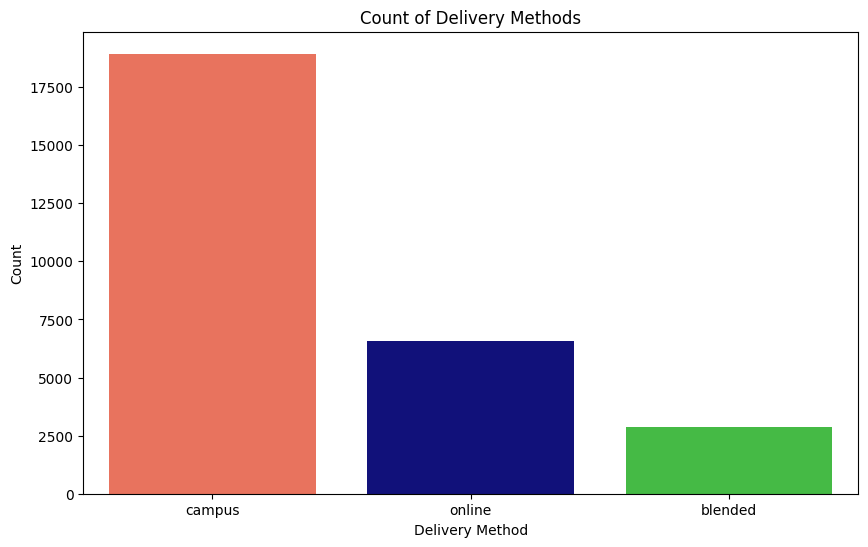

In [ ]:
# Create the countplot

# Define colors for each category
colors = ['#FF6347', '#00008B', '#32CD32']

plt.figure(figsize=(10, 6))
sns.countplot(x='Delivery Method', data=df, palette=colors)
plt.title('Count of Delivery Methods')
plt.xlabel('Delivery Method')
plt.ylabel('Count')
plt.show()

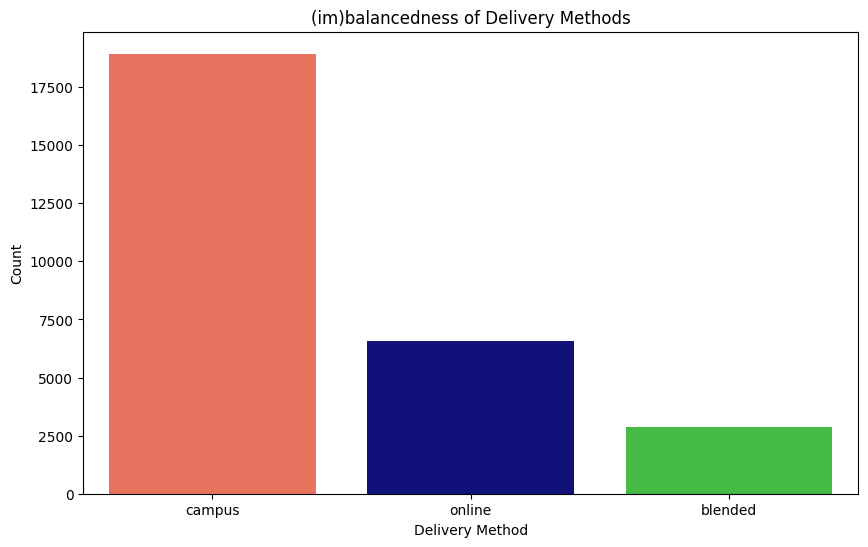

In [ ]:
# Checking for (im)balancedness

# Define a palette with different colors
palette = ['#FF6347', '#00008B', '#32CD32']

plt.figure(figsize=(10, 6))
sns.countplot(x='Delivery Method', data=df, palette=palette)
plt.title('(im)balancedness of Delivery Methods')
plt.xlabel('Delivery Method')
plt.ylabel('Count')
plt.show()

In [ ]:
# Check for missing values
df.isnull().sum()


Course Name                    0
Delivery Method               84
Enrolment                      0
Respondents                    0
Response Rate                 11
Student Satisfaction Score     0
dtype: int64

<Axes: >

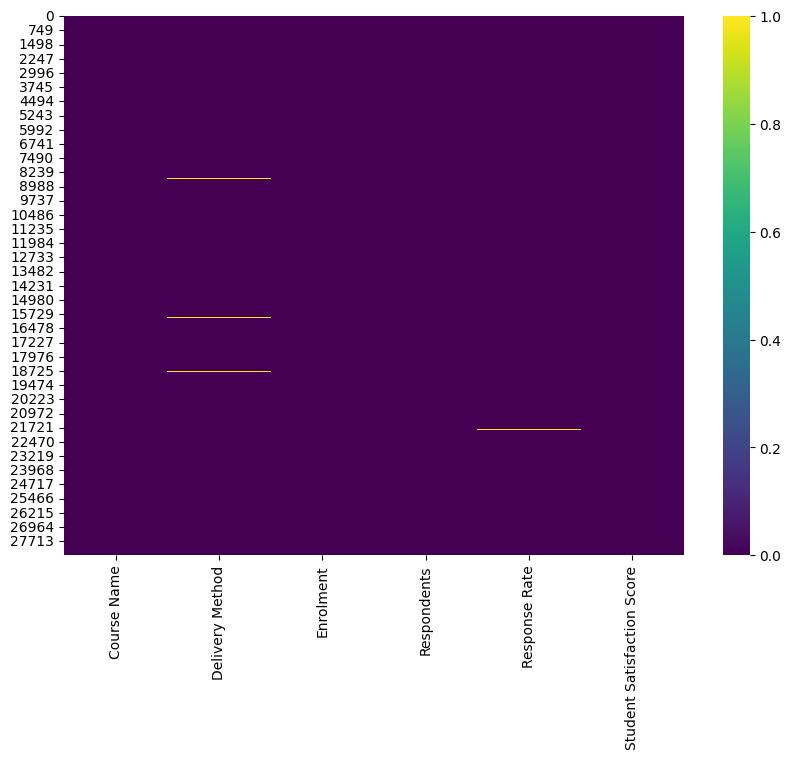

In [ ]:
# No missing value, the heatmap is blank
plt.rcParams['figure.figsize'] = (10, 7)
sns.heatmap(df.isnull(), cmap ='viridis')

In [ ]:
# Remove rows with any null values
df_data = df.dropna()
df_data.isnull().sum()

Course Name                   0
Delivery Method               0
Enrolment                     0
Respondents                   0
Response Rate                 0
Student Satisfaction Score    0
dtype: int64

<Axes: >

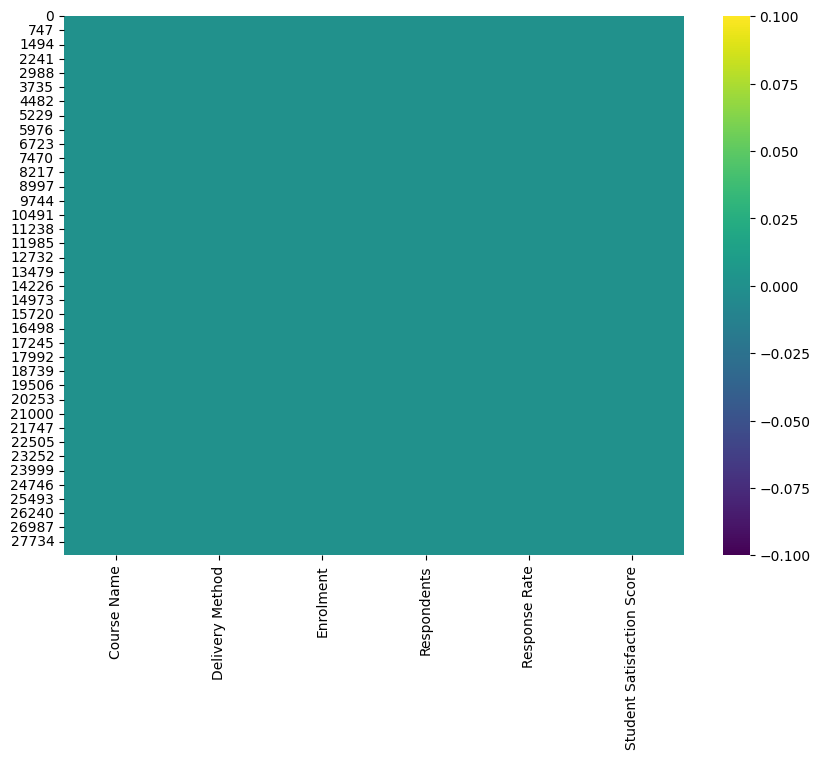

In [ ]:
# No missing value, the heatmap is blank
plt.rcParams['figure.figsize'] = (10, 7)
sns.heatmap(df_data.isnull(), cmap ='viridis')

<Axes: xlabel='Delivery Method', ylabel='Count'>

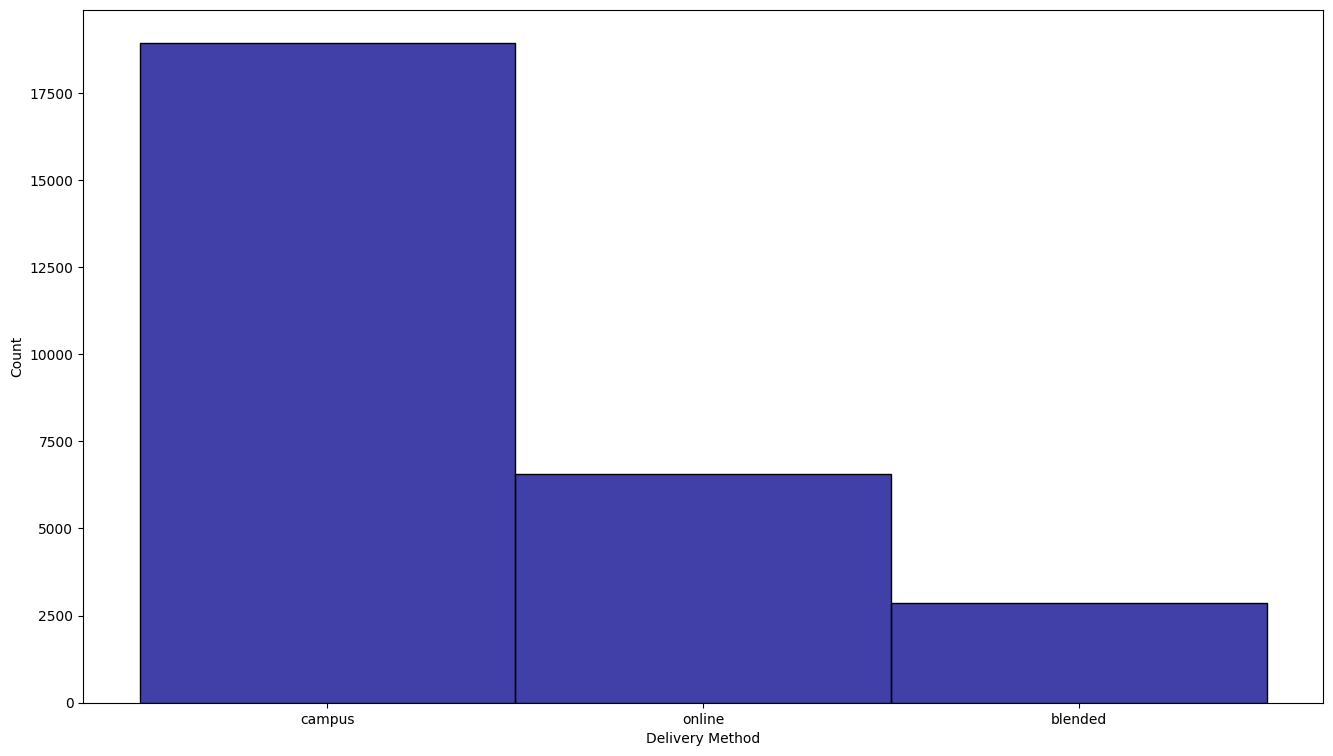

In [ ]:
#Check for outliers
f, ax = plt.subplots(figsize=(16, 9))
sns.histplot(x='Delivery Method',data=df_data, color='#00008B')

<Axes: xlabel='Delivery Method'>

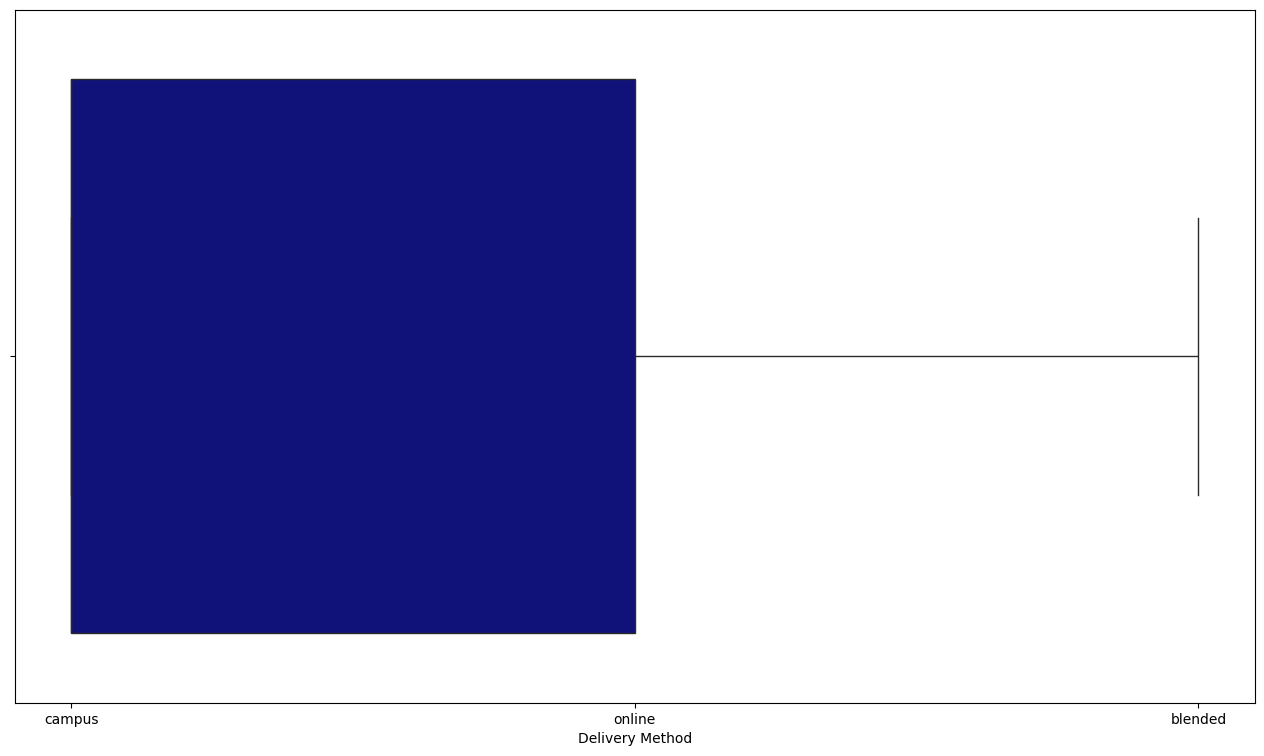

In [ ]:
#Check for outliers
f, ax = plt.subplots(figsize=(16, 9))
sns.boxplot(x='Delivery Method',data=df_data, color='#00008B')

Check for missing, extreme or unrealistic values. Remove them when present in the dataset. You can use the dataset.describe() function to determine the key statistical properties of the dataset. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html).

In [ ]:
# Statistical analysis
df_data.describe()

,Enrolment,Respondents
count,28359.000000,28359.000000
mean,122.905744,48.786311
std,511.648135,278.313771
min,1.000000,1.000000
25%,26.000000,7.000000
50%,45.000000,14.000000
75%,83.000000,30.000000
max,28080.000000,15680.000000


In [ ]:
# Extract numerical part and convert to float
df_data['Response Rate'] = df_data['Response Rate'].str.rstrip('%').astype('float') / 100.0

In [ ]:
# Extract numerical part and convert to float
df_data['Student Satisfaction Score'] = df_data['Student Satisfaction Score'].str.rstrip('%').astype('float') / 100.0

In [ ]:
df_data['Delivery Method'] = df_data['Delivery Method'].map({'online': 1, 'campus': 0, 'blended': 2})

In [ ]:
# Get unique programs
unique_programs = df_data['Course Name'].unique()
print(f'Unique programs: {unique_programs}')

# Count the number of unique programs
num_programs = df_data['Course Name'].nunique()
print(f'There are {num_programs} unique programs in the dataset.')

Unique programs: ['AB InBev Corporate Affairs Excise Programme'
 'ABSA PDBA - Career Advancement ' 'Advanced Diploma'
 'Advanced Entrepreneurship:Leadership & Practice'
 'Advanced Leadership and Management Course to Build Capacity towards Malaria Elimination '
 'Advanced Professional Business Coaching Programme'
 'AECI SMDP - Advanced Diploma' 'Africa in 2050 Betting on Ourselves'
 'AGCO Africa Agribusiness Qualification '
 'AIG Senior Leadership Masterclasses' 'Aspen Activate Programme'
 'Aspen Ascend Programme '
 'Aspen Ascend Team Effectiveness with Jackie Wilken'
 'Behaviour Science for Business Impact' 'BMGF Programme'
 'Board Leadership Programme ' 'Bridgestone Leading Self'
 'Bridgestone NQF 4 Leading ' 'Bridgestone NQF 5 Leading Managers '
 'Building Brands' 'Business Communication for Impact'
 'Businesss Oppportunities and Innovation' 'CalBank '
 'CBZ Holdings  Mergers & Acquisitions Strategies for Successful Post Acquisition Integration'
 'CELL C MANAGEMENT DEVELOPMENT PROGRA

In [ ]:
df_data.head()

,Course Name,Delivery Method,Enrolment,Respondents,Response Rate,Student Satisfaction Score
0,AB InBev Corporate Affairs Excise Programme,0,270,108,0.4,0.0000
1,AB InBev Corporate Affairs Excise Programme,0,15,6,0.4,0.0000
2,AB InBev Corporate Affairs Excise Programme,0,45,18,0.4,0.0000
3,AB InBev Corporate Affairs Excise Programme,0,15,6,0.4,0.8333
4,AB InBev Corporate Affairs Excise Programme,0,15,6,0.4,0.8333


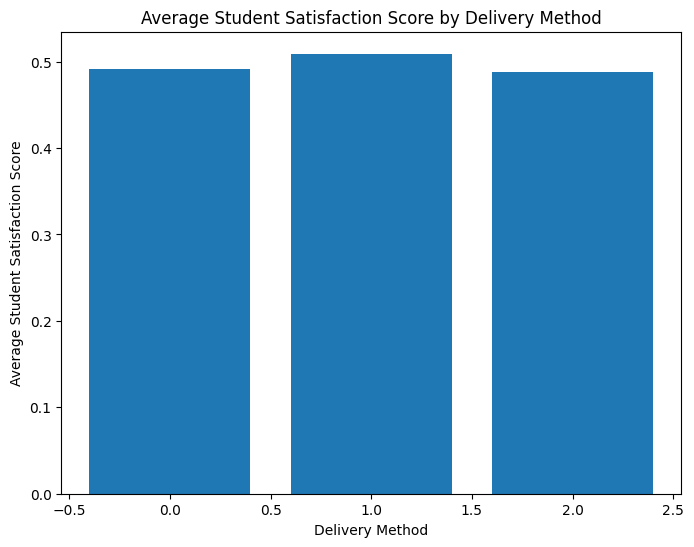

In [ ]:
#Average Student Satisfaction Score by Delivery Method

import matplotlib.pyplot as plt

avg_satisfaction = df_data.groupby('Delivery Method')['Student Satisfaction Score'].mean()

plt.figure(figsize=(8, 6))
plt.bar(avg_satisfaction.index, avg_satisfaction.values)
plt.xlabel('Delivery Method')
plt.ylabel('Average Student Satisfaction Score')
_ = plt.title('Average Student Satisfaction Score by Delivery Method')

In [ ]:
# Statistical analysis
df_data.describe()

,Delivery Method,Enrolment,Respondents,Response Rate,Student Satisfaction Score
count,28359.000000,28359.000000,28359.000000,28359.000000,28359.000000
mean,0.433266,122.905744,48.786311,0.404993,0.495312
std,0.669093,511.648135,278.313771,0.543699,0.437606
min,0.000000,1.000000,1.000000,0.004000,0.000000
25%,0.000000,26.000000,7.000000,0.167000,0.000000
50%,0.000000,45.000000,14.000000,0.286000,0.666700
75%,1.000000,83.000000,30.000000,0.514000,1.000000
max,2.000000,28080.000000,15680.000000,10.000000,1.000000


**Data Cleaning Interpretation**

Missing data from the dataset was cleaned.



**Preprocessing and compiling a training set and test set**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_data['Course Name'])
y = df_data['Delivery Method']

print(X.shape)
print(y.shape)

(28359, 309)
(28359,)


**Training and testing**

In [ ]:
# Creating training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling with standardscaler

from sklearn.preprocessing import MaxAbsScaler  # Import MaxAbsScaler

scaler = MaxAbsScaler()  # Use MaxAbsScaler instead of MinMaxScaler

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.8693582510578279
Confusion Matrix:
 [[3666  140   26]
 [ 205 1078   23]
 [ 322   25  187]]


In [ ]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3832
           1       0.87      0.83      0.85      1306
           2       0.79      0.35      0.49       534

    accuracy                           0.87      5672
   macro avg       0.84      0.71      0.75      5672
weighted avg       0.86      0.87      0.86      5672



 **Model Testing Interpretation
Conclusion**

- The high accuracy indicates that the model performs well overall.
- Campus 0 and Online 1 have high precision and recall, indicating the model is good at predicting these classes.
- Blended 2 has lower recall, suggesting the model might struggle with
predicting this class correctly.

These F1-scores indicate the model's performance for each class, considering both precision and recall. The high F1-scores across all classes suggest that the model performs well in predicting each class accurately.

**Recommendations**

To improve hybrid classes and increase student preference, focus on enhancing online content with interactive materials, diverse resources, and real-time feedback, while designing in-person sessions around active learning and practical application. Ensure seamless integration between online and in-person components, using a flipped classroom model and consistent themes. Leverage reliable technology, provide tech support, and offer personalized learning paths with flexible scheduling. Enhance communication with regular check-ins, peer support groups, and accessible instructors. Increase engagement through gamification and clear objectives, and continuously gather and act on student feedback to iteratively improve the hybrid learning experience.





**ANOVA(Analysis of Variance) model:**

To perform an Analysis of Variance (ANOVA) to test for differences in student satisfaction scores across different delivery methods (online, campus, blended)

**Primary Research Question:**

Is there a significant difference in student satisfaction scores based on the delivery method (online, Campus, blended)?


In [ ]:
# Perform ANOVA

delivery_methods = df_data['Delivery Method'].unique()
anova_data = {method:df_data['Student Satisfaction Score'][df_data['Delivery Method'] == method] for method in delivery_methods}


In [ ]:
# Perform ANOVA
anova_result = f_oneway(*anova_data.values())

# Print ANOVA results
print("ANOVA Results:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

# Interpretation:
alpha = 0.05  # Set your significance level
if anova_result.pvalue < alpha:
    print("Reject null hypothesis: There is a significant difference in satisfaction scores based on delivery method.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in satisfaction scores based on delivery method.")

ANOVA Results:
F-statistic: 4.2748124262727325
p-value: 0.013923626885785127
Reject null hypothesis: There is a significant difference in satisfaction scores based on delivery method.


**Interpretation of ANOVA Results:**
F-statistic (4.2748):

The F-statistic is a measure used in ANOVA to determine whether there are any statistically significant differences between the means of different groups.
An F-statistic of 4.2748 indicates that the ratio of the variance between groups to the variance within groups is 4.2748. This value is compared against a critical value from the F-distribution table to determine statistical significance.
p-value (0.0139):

The p-value indicates the probability of obtaining an F-statistic at least as extreme as the one observed, assuming the null hypothesis is true.
A p-value of 0.0139 is less than the common significance level of 0.05.
Reject the null hypothesis:

The null hypothesis in ANOVA typically states that there are no differences between the group means (i.e., all groups have the same mean satisfaction scores).
Since the p-value (0.0139) is less than 0.05, we reject the null hypothesis.

**Conclusion and Recommendations**

Given that the ANOVA results show significant difference in satisfaction scores based on the delivery method, it’s recommended to adopt a flexible, hybrid approach that combines online, in-person, and blended learning. This allows students to choose the method that best suits their learning style and schedule, enhancing overall satisfaction. Enhancing online learning with interactivity and robust support, making in-person classes more engaging, and combining strengths in blended learning can address diverse student needs.

To improve student satisfaction scores, institutions should regularly gather feedback through surveys and focus groups to make continuous improvements. Active learning strategies, strong academic and mental health support services, clear communication of expectations, and accessible resources are essential. Providing tech training and fostering a sense of community can further enhance the learning experience across all delivery methods.